# The German Nobles in Paris in 1854 #
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5506685.svg)](https://doi.org/10.5281/zenodo.5506685)

Historical data are loaded from the dataset [https://zenodo.org/record/5506685/files/dataset-german-nobles-in-paris-1854.csv?download=1](https://zenodo.org/record/5506685/files/dataset-german-nobles-in-paris-1854.csv?download=1) linked to the :
>__Adreßbuch der Deutschen in Paris für das Jahr 1854__ ([Kronauge, 1854](#Kronauge))
![Book's cover](https://19jhdhip.hypotheses.org/files/2012/12/adressbuch1854.jpg)

In [47]:
def libraries():
  """
  This cell installs and loads several needed libraries from Python
  ------------------------------------------------------------
  This notebook is coded in Python 3
  - To load and work with data
       + pandas
  - To display results, it uses 
       + markdown (md)
       + pyplot for charts
       + and HTML 5 languages (with IPython.core.display)
          + Context Object in span for Zotero
          + Urllib
          + Image
          + schema.org in microdata for semantic contents
          + leaflet for maps (with folium)
   - To query DBpedia
       + SPARQL is used (SPARQLWrapper, JSON)
  ------------------------------------------------------------
  """
# the query langage is SPARQL, we have to install it with pip
# (pip = packages installer for python)
# %pip install geopandas
%pip install SPARQLWrapper
%pip install folium
import pandas as pd
import folium
from folium import plugins
from folium.plugins import MiniMap
import geopandas
# Here all that we will need to run the Python Notebook:
# load the pandas library : to play with tables & figures
import pandas as pd
# semantic communication with dbpedia
from SPARQLWrapper import SPARQLWrapper, JSON
# to draw lovely leaflet maps we need to install and load "folium"
import folium
from folium import plugins
# to easily display results and use HTML
from IPython.core.display import HTML
from IPython.display import Image
# to fix misencoded URL (i.e. URL of dpPedia pics)
import urllib.parse
# to draw lovely charts like histograms or pie charts
from matplotlib import pyplot as plt

help(libraries)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Help on function libraries in module __main__:

libraries()
    This cell installs and loads several needed libraries from Python
    ------------------------------------------------------------
    This notebook is coded in Python 3
    - To load and work with data
         + pandas
    - To display results, it uses 
         + markdown (md)
         + pyplot for charts
         + and HTML 5 languages (with IPython.core.display)
            + Context Object in span for Zotero
            + Urllib
            + Image
            + schema.org in microdata for semantic contents
            + leaflet for maps (with folium)
     - To query DBpedia
         + SPARQL is used (SPARQLWrapper, JSON)
    ------------------------------------------------------------



In [48]:
url = 'https://zenodo.org/record/5506685/files/dataset-german-nobles-in-paris-1854.csv'
# load a CSV file dataframe from Zenodo dataset
# values separated by a " ; " sign
# data is the name of the dataframe
data = pd.read_csv(url,sep = ';')
# enumerate loaded columns
columns_number=data.shape[1]
# count numbers of nobles
noble_number=data.shape[0]
print("In the 1854 Adressbuch dataset we found",noble_number,"german nobles in Paris")
print("here you can see a sample of the dataset :")
data

In the 1854 Adressbuch dataset we found 116 german nobles in Paris
here you can see a sample of the dataset :


,id,surname,first_name,gender,title,profession_verbatim,occupation_group,legion_d_honneur,status,military_status,...,geo_long,geo_lat,post1860,post18602,post18603,pre1860,pre18602,pre18603,pre18604,pre18605
0,587,Mackau von,G.,M,Baron,"Admiral, Senator",Militär,Chevalier,Active,Military,...,2.32824,48.8725,9.0,NaN,NaN,2.0,1,NaN,NaN,NaN
1,717,Schramm,G.,M,Graf,"Divisionsgeneral, Senator",Militär,Chevalier,Active,Military,...,2.33258,48.8688,2.0,NaN,NaN,2.0,3,5,NaN,NaN
2,97,Hamel von,NaN,M,Graf,NaN,Adel,NaN,Active,Civil,...,2.28751,48.8451,15.0,NaN,NaN,10.0,11,communes annexées,NaN,NaN
3,287,Adelswaerd,G.,M,Baron von,Secretär der schwedischen Gesandtschaft,Beamte,NaN,Active,Civil,...,2.31387,48.8798,8.0,17.0,NaN,1.0,communes annexées,NaN,NaN,NaN
4,295,Allemans,NaN,M,Baron von,NaN,Adel,NaN,Active,Civil,...,2.31839,48.8699,8.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,4108,Kronowska,NaN,F,Gräfin v Tabaß,NaN,Adel,NaN,Active,Civil,...,0.00000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,3808,Terlecki,NaN,M,Abbe,"Doctor der Medecin u. Theologie, Vorsteher der...",Selbständig,no_rank,Active,Civil,...,2.32128,48.8517,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
113,3874,Goschler,NaN,M,Abbe,Director des Collegiums Stanislaus,Selbständig,no_rank,Active,Civil,...,2.33110,48.8436,6.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN
114,3914,Jager,NaN,M,Abbe,Professor der Theologie,Selbständig,no_rank,Active,Civil,...,2.32358,48.8479,6.0,15.0,NaN,11.0,10,communes annexées,NaN,NaN


## What do I have to say about the " Légion d'honneur " ?
From the beginning (1802), the Legion of Honor was aimed at __both civilians and soldiers alike__. Napoleon is also credited with the famous sentence :
> "I want to decorate my soldiers and my scientists".

<h2 id="DBpedia">What does have DBpedia to say about the " Légion d'honneur " ?</h2>

In [62]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql")

# Query for the description of "Legion_of_Honour", filtered by language 
sparql.setQuery("""
PREFIX dbpedia-owl: <http://dbpedia.org/ontology/>              
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>                
SELECT ?label ?comment ?thumbnail
WHERE {                                
  <http://dbpedia.org/resource/Legion_of_Honour> rdfs:label ?label .                
  <http://dbpedia.org/resource/Legion_of_Honour> rdfs:comment ?comment .                               
  <http://dbpedia.org/resource/Legion_of_Honour> dbpedia-owl:thumbnail ?thumbnail .   
FILTER (LANG(?label)='en' AND LANG(?comment)='en')                              
}  
""")

# Convert results to JSON format
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

for hit in result["results"]["bindings"]:
  abstract=hit["comment"]["value"]
  pic=hit["thumbnail"]["value"]
  title=hit["label"]["value"]
  pic_path='http://commons.wikimedia.org/wiki/Special:FilePath/'
  image_file_name=pic.replace('http://commons.wikimedia.org/wiki/Special:FilePath/','')
  image_file_name=image_file_name.replace('?width=300','')
  #print(image_file_name)
  encoded_pic_name = urllib.parse.quote(image_file_name)
  # We use microdata to inject some semantic content 
  # here a definition from dpepia
  code_html='<div itemscope itemtype="https://schema.org/DefinedTerm" id="'+title+'">'
  code_html+='<h2>What DBpedia has to say about <dfn itemprop="name">'+title+'</dfn> : </h2>'
  code_html+='<link itemprop="url" href="http://dbpedia.org/resource/Legion_of_Honour"/>'
  code_html+='<p itemprop="description">'+abstract+'</p>'
  code_html+='<link itemprop="inDefinedTermSet" href="http://dbpedia.org/">';
  code_html+='<img itemprop="image" src="'+pic_path+encoded_pic_name+'" title="'+title+'" alt="Picture from DPpedia">'
  code_html+='</div>'
  #print(code_html)
  display(HTML(code_html))

In [63]:
number_chevaliers=data.value_counts(data['legion_d_honneur']=="Chevalier")
number_officiers=data.value_counts(data['legion_d_honneur']=="Officier")
number_grand_officiers=data.value_counts(data['legion_d_honneur']=="Grand Officier")
number_grand_croix=data.value_counts(data['legion_d_honneur']=="Grand-Croix")
print("In the dataset of noble German in Paris in 1854, dealing with 'la Légion d'honneur':")
print("-",number_chevaliers.values[1],"had the 'chevalier' grade")
print("-",number_officiers.values[1],"had the 'officier' grade")
print("-",number_grand_officiers.values[1],"had 'grand officier' grade") 
print("- and none had 'Commander' or 'Grand-Croix' grade")

In the dataset of noble German in Paris in 1854, dealing with 'la Légion d'honneur':
- 13 had the 'chevalier' grade
- 2 had the 'officier' grade
- 1 had 'grand officier' grade
- and none had 'Commander' or 'Grand-Croix' grade


In [64]:
# i is a counter for nobles with "Légion d'honneur"
# and j is a counter for nobles without "Légion d'honneur"
i=0
j=0
ldh_noble = []
decorations = []
# Include a nice HTML subtitle
display(HTML('<h2>List of german nobles with "Légion d\'honneur" </h2>'))
for myindex, ligne in data.iterrows():
  # move "von" or "Von" before the familly name
  chaine = ligne["surname"]
  chaine = chaine.replace(" von", "")
  chaine = chaine.replace(" Von", "")
  title = ligne["title"]
  title = title.replace(" Von", "")
  title = title.replace(" von", "")
  if ("von" in ligne["surname"] or "von" in ligne["title"]):
      familly_name="von "+chaine
  elif ("Von" in ligne["surname"] or "Von" in ligne["title"]):
      familly_name="von "+chaine
  else:
      familly_name=chaine
  taille_legion=len(str(ligne["legion_d_honneur"]))
  if (taille_legion > 3 and ligne["legion_d_honneur"]!="no_rank") :
    i=i+1
    taille_firstname = len(str(ligne["first_name"]))
    decorations.append(ligne["legion_d_honneur"])
    # 3 is the size for NaN type 
    if taille_firstname == 3 :
      print(title+" "+familly_name+", "+ligne["military_status"]+", "+ligne["legion_d_honneur"])
      current = { "id":ligne["id"],"first_name=":"Unknown","legion_grade":ligne["legion_d_honneur"]}
    else:
      print(title+" "+familly_name+", "+ligne["first_name"]+", "+ligne["military_status"]+", "+ligne["legion_d_honneur"])
      current = { "id":ligne["id"],"first_name=":ligne["first_name"],"legion_grade":ligne["legion_d_honneur"]}
    # if people has no lgh
    j=j+1
  ldh_noble.append(current)
#print(ldh_noble)
#print(decorations)
nb_lgh=i
nb_without_lgh=j
display(HTML('<hr>'))
print("There were",nb_lgh,"nobles with 'Légion d'honneur' on the population of",noble_number,"living in Paris in 1854")

Baron von Mackau, G., Military, Chevalier
Graf Schramm, G., Military, Chevalier
Baron von Billing, C., Civil, Chevalier
Graf von Fezensac, Civil, Chevalier
Graf von Lövenhielm, G. O., Civil, Chevalier
Baron Wolbock, Civil, Chevalier
Herzog von Elchingen, O., Civil, Chevalier
Baron von Rothschild, Salomon, Civil, Grand Officier
Graf von Tascher, O., Civil, Chevalier
Baron von Rothschild, Joh. G.O., Civil, Chevalier
Baron Langsdorff, O., Civil, Chevalier
Graf und Gräfin von Nieuwerkerke, Civil, Officier
Baron von Heeckeren, Civil, Chevalier
General Graf Ordener, G. O., Civil, Chevalier
Graf von Nieuwerkerke, Civil, Officier
Graf Miglied des Institus von Pradel, O., Civil, Chevalier


There were 16 nobles with 'Légion d'honneur' on the population of 116 living in Paris in 1854


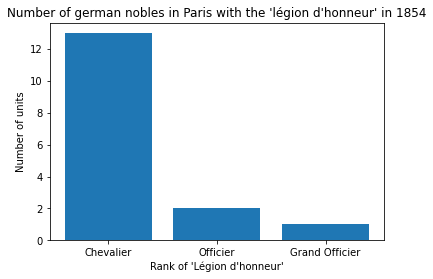

In [65]:
decorations_list_ldh = ['Chevalier','Officier','Grand Officier']
decorations_count_ldh = [decorations.count('Chevalier'),decorations.count('Officier'),decorations.count('Grand Officier')]
plt.bar(decorations_list_ldh,decorations_count_ldh)
plt.title("Number of german nobles in Paris with the 'légion d'honneur' in 1854")
plt.xlabel("Rank of 'Légion d'honneur'")
plt.ylabel("Number of units")
plt.show()

In [66]:
percent_of_nobles_with_lgh = nb_lgh / noble_number * 100 
print(str(round(percent_of_nobles_with_lgh)) + "% of noble Germans in Paris in 1854 received one of the 'Légion d'honneur' distinction")

14% of noble Germans in Paris in 1854 received one of the 'Légion d'honneur' distinction


In [67]:
# Not the best code ever
soldier_status=data.value_counts(data['occupation_group']=="Militär")
noble_status=data.value_counts(data['occupation_group']=="Adel")
functionary_status=data.value_counts(data['occupation_group']=="Beamte")
self_employed_status=data.value_counts(data['occupation_group']=="Selbständig")
craftsmen_status=data.value_counts(data['occupation_group']=="Handwerk")
merchants_status=data.value_counts(data['occupation_group']=="Handel")
retired_status=data.value_counts(data['occupation_group']=="Rentner")
annuitant_status=data.value_counts(data['occupation_group']=="Rentier")
Other_employed_status=soldier_status[True]+self_employed_status[True]+craftsmen_status[True]
Other_employed_status+=merchants_status[True]+retired_status[True]+annuitant_status[True]
print("Most of nobles's activities are not clearly defined : "
      + str(noble_status[True])
      +" are described with the 'Adel' term, which is quite fuzzy.")
print("The 1st category of occupation by ranking is 'functionaries' with a value of "
      +str(functionary_status[True])+" persons. ")
print("Listed nobles with other working status (soldiers, self-employed, craftsmen," 
      " merchants, retired and annuitants) were only "
      +str(Other_employed_status)+".")

Most of nobles's activities are not clearly defined : 89 are described with the 'Adel' term, which is quite fuzzy.
The 1st category of occupation by ranking is 'functionaries' with a value of 15 persons. 
Listed nobles with other working status (soldiers, self-employed, craftsmen, merchants, retired and annuitants) were only 12.


In [68]:
occupation_nobles = []
for i,ligne in data.iterrows():
  current_occupation = ligne["occupation_group"]
  occupation_nobles.append(current_occupation)
#print(occupation_nobles)

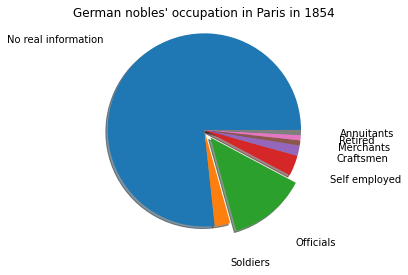

In [69]:
occupation_list_nobles_status = ['No real information',
                                 'Soldiers',
                                 'Officials',
                                 'Self employed',
                                 'Craftsmen',
                                 'Merchants',
                                 'Retired',
                                 'Annuitants'
                                 ]
occupation_count_list = [occupation_nobles.count('Adel'),
                         occupation_nobles.count('Militär'),
                         occupation_nobles.count('Beamte'),
                         occupation_nobles.count('Selbständig'),
                         occupation_nobles.count('Handwerk'),
                         occupation_nobles.count('Handel'),
                         occupation_nobles.count('Rentner'),
                         occupation_nobles.count('Rentier')
                         ]
labels = occupation_list_nobles_status
sizes = occupation_count_list
explode = (0, 0, 0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice:'officials' 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, labeldistance = 1.4)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("German nobles' occupation in Paris in 1854")
plt.show()

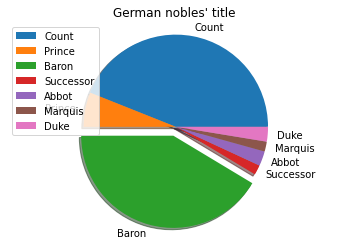

In [70]:
title_nobles = []
for i,ligne in data.iterrows():
  current_title = ligne['title']
  if 'Graf' in current_title:
    title_nobles.append('Graf or Gräfin')
  elif ('Gräfin' in current_title):
    title_nobles.append('Graf or Gräfin')
  elif 'Prinz' in current_title:
    title_nobles.append('Prinz or Prinzessin')
  elif 'Baron' in current_title:
    title_nobles.append('Baron or Baronnin')
  elif 'Nachfolger' in current_title:
    title_nobles.append('Successor')
  elif 'Abbe' in current_title:
    title_nobles.append('Abbe')
  elif 'Marquis' in current_title:
    title_nobles.append('Marquis or Marquise')
  elif 'Herzog' in current_title:
    title_nobles.append('Herzog or Herzogin')
  else:
    title_nobles.append(current_title)
    print("hum : "+current_title)
nobles_status=[
    'Count',
    'Prince',
    'Baron',
    'Successor',
    'Abbot',
    'Marquis',
    'Duke'
]
nobles_status_list = [
    title_nobles.count('Graf or Gräfin'),
    title_nobles.count('Prinz or Prinzessin'),
    title_nobles.count('Baron or Baronnin'),
    title_nobles.count('Successor'),
    title_nobles.count('Abbe'),
    title_nobles.count('Marquis or Marquise'),
    title_nobles.count('Herzog or Herzogin')
]
#print(nobles_status_list)
labels = nobles_status
sizes = nobles_status_list
fig1, ax1 = plt.subplots()
explode = (0, 0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice 
ax1.pie(sizes, explode=explode,labels=labels,shadow=True, labeldistance = 1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("German nobles' title")
plt.legend()
plt.show()

In [71]:
map_paris = folium.Map(
    location = [48.856578,2.351828], 
    zoom_start = 14,
    max_bounds=True,
    max_lat=48.813141, max_lon=2.234129,
    min_lat=48.908715, min_lon=2.422941
)
columns_number=data.shape[1]

In [58]:
for i in range(data.shape[0]):
  location=[data['geo_lat'][i],data['geo_long'][i]]
  full_name = data['title'][i] + " "+ data['surname'][i] + ", "+ data['occupation_group'][i]
  legende=full_name
  folium.Marker(location, popup=(legende)).add_to(map_paris)
map_paris

In [72]:
m = folium.Map(
    location = [48.856578,2.351828], 
    zoom_start = 14,
    max_bounds=True,
    max_lat=48.813141, max_lon=2.234129,
    min_lat=48.908715, min_lon=2.422941
)
folium.raster_layers.TileLayer(
    tiles="https://wxs.ign.fr/cartes/geoportail/wmts?" +
        "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0" +
        "&STYLE=normal" +
        "&TILEMATRIXSET=PM" +
        "&FORMAT=image/jpeg"+
        "&LAYER=GEOGRAPHICALGRIDSYSTEMS.ETATMAJOR40" +
        "&TILEMATRIX={z}" +
        "&TILEROW={y}" +
        "&TILECOL={x}",
        attr='IGN-F/Geoportail',
        opacity=1,
        transparent=True,
        name="Staff Card, 1822-1866 from IGN"
).add_to(m)
folium.LayerControl().add_to(m)
for i in range(data.shape[0]):
  location=[data['geo_lat'][i],data['geo_long'][i]]
  full_name = data['title'][i] + " "+ data['surname'][i] + ", "+ data['occupation_group'][i]
  legende=full_name
  folium.Marker(location, popup=(legende)).add_to(m)
m

<!-- In HTML5 with COinS (Niso-Z39-88) for bibliography exposal to Zotero -->
<h3 id="bibliography">Bibliography</h3>
<div class="csl-bib-body" style="line-height: 2; margin-left: 2em; text-indent:-2em;">
  <div id="Koenig1" class="csl-entry">König, M. (Ed.). (2003). <i>Deutsche Handwerker, Arbeiter und Dienstmädchen in Paris: Eine vergessene Migration im 19. Jahrhundert</i>. Oldenbourg Verlag. <a href="https://doi.org/10.1524/9783486834383">https://doi.org/10.1524/9783486834383</a></div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=urn%3Aisbn%3A978-3-486-56761-8&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=Deutsche%20Handwerker%2C%20Arbeiter%20und%20Dienstm%C3%A4dchen%20in%20Paris%3A%20eine%20vergessene%20Migration%20im%2019.%20Jahrhundert&amp;rft.publisher=Oldenbourg%20Verlag&amp;rft.aufirst=Mareike&amp;rft.aulast=K%C3%B6nig&amp;rft.au=Mareike%20K%C3%B6nig&amp;rft.date=2003&amp;rft.tpages=220&amp;rft.isbn=978-3-486-56761-8&amp;rft.language=de"></span>
  <div id="Koenig2" class="csl-entry">König, M. (2006). Les Allemands à Paris au XIXe siècle. <i>Annuaires de l’École Pratique Des Hautes Études</i>, <i>137</i>(20), 387–389. <a href="https://doi.org/fr">https://doi.org/fr</a></div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=info%3Adoi%2Ffr&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Les%20Allemands%20%C3%A0%20Paris%20au%20XIXe%20si%C3%A8cle&amp;rft.jtitle=Annuaires%20de%20l'%C3%89cole%20pratique%20des%20hautes%20%C3%A9tudes&amp;rft.volume=137&amp;rft.issue=20&amp;rft.aufirst=Mareike&amp;rft.aulast=K%C3%B6nig&amp;rft.au=Mareike%20K%C3%B6nig&amp;rft.date=2006&amp;rft.pages=387%E2%80%93389&amp;rft.spage=387&amp;rft.epage=389&amp;rft.issn=0292-0980"></span>
  <div id="Kronauge" class="csl-entry">Kronauge, F. A. (1854). <i>Adreßbuch der Deutschen in Paris für das Jahr 1854 oder vollständiges Adreßverzeichniß aller in Paris und seinen Vorständten wohnenden selbst&nbsp; andigen Deutschen in alphabetischer Ordnung.</i> Bibliothèque historique de la ville de Paris. <a href="https://bibliotheques-specialisees.paris.fr/ark:/73873/pf0000884072">https://bibliotheques-specialisees.paris.fr/ark:/73873/pf0000884072</a></div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=Adre%C3%9Fbuch%20der%20Deutschen%20in%20Paris%20f%C3%BCr%20das%20Jahr%201854%20oder%20vollst%C3%A4ndiges%20Adre%C3%9Fverzeichni%C3%9F%20aller%20in%20Paris%20und%20seinen%20Vorst%C3%A4ndten%20wohnenden%20selbst%20%20andigen%20Deutschen%20in%20alphabetischer%20Ordnung.&amp;rft.place=Paris%2C%20France&amp;rft.aufirst=F.%20A.&amp;rft.aulast=Kronauge&amp;rft.au=F.%20A.%20Kronauge&amp;rft.date=1854&amp;rft.tpages=252&amp;rft.language=de"></span>
  <div id="HISCO" class="csl-entry">Leeuwen, M., Maas, I., &amp; Miles, A. (2002). <i>HISCO: Historical international standard classification of occupations</i>. Leuven: Leuven University Press.</div>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=HISCO%3A%20Historical%20international%20standard%20classification%20of%20occupations&amp;rft.publisher=Leuven%3A%20Leuven%20University%20Press&amp;rft.aufirst=MHDV&amp;rft.aulast=Leeuwen&amp;rft.au=MHDV%20Leeuwen&amp;rft.au=Ineke%20Maas&amp;rft.au=Andrew%20Miles&amp;rft.date=2002"></span>
  <span class="Z3988" title="url_ver=Z39.88-2004&amp;ctx_ver=Z39.88-2004&amp;rfr_id=info%3Asid%2Fzotero.org%3A2&amp;rft_id=urn%3Aisbn%3A978-1-4051-0321-3&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=book&amp;rft.btitle=Companion%20to%20Digital%20Humanities%20(Blackwell%20Companions%20to%20Literature%20and%20Culture)&amp;rft.place=Oxford&amp;rft.publisher=Blackwell%20Publishing%20Professional&amp;rft.edition=Hardcover&amp;rft.series=Blackwell%20Companions%20to%20Literature%20and%20Culture&amp;rft.aufirst=Susan&amp;rft.aulast=Schreibman&amp;rft.au=Susan%20Schreibman&amp;rft.au=Ray%20Siemens&amp;rft.au=John%20Unsworth&amp;rft.date=2004-12&amp;rft.isbn=978-1-4051-0321-3"></span>
</div>

<hr>
<footer id="about">
<p style="text-align:right" xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/">
     <a property="dct:title" rel="cc:attributionURL" href="https://jupyter-cloud.gwdg.de/user/0588211/lab/tree/mynotebooks/CorpusAdrressBuch/Adressbuch_nobles_9_sept.ipynb">Jupyter Notebook "German nobles in Paris, 1854"</a>
    <img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;"
         src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1">
    <img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;"
         src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1">
    <img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;"
         src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1">
    <img style="height:22px!important;margin-left:3px;vertical-align:text-bottom"
         src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1">
     <br>
     by 
     <a rel="cc:attributionURL dct:creator" 
        property="cc:attributionName" 
        href="https://www.dhi-paris.fr/fr/institut/lequipe/equipe-scientifique/gerald-kembellec.html">
         Gérald Kembellec</a> is licensed under 
     <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" 
        target="_blank" 
        rel="license noopener noreferrer" style="display:inline-block;">
         CC BY-NC-SA 4.0
     </a>
</p>     
    <a id="mailme"
       href="mailto:gkembellec@dhi-paris.fr?subject=Semantic%20Publishing%20notebook&body=Dear%20Gérald%0A%0AAbout%20your%20notebook..."> - mail me.</a>
</footer>